In [26]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Load the MNIST dataset
x, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

In [28]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


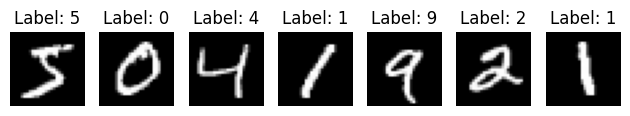

In [29]:
num_images_to_plot = 7
for i in range(num_images_to_plot):
    image = x[i].reshape(28, 28)  # Reshape the image from 1D to 2D
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**CONVERT TO BINARY CLASSIFICATION TASK WHERE WE PREDICT 5's ONLY**

In [30]:
y_binary = np.where(y=='5',1,0)
print(y_binary)
y_binary.shape

[1 0 0 ... 0 1 0]


(70000,)

**DATA PREPROCESSING**

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled.shape

(70000, 784)

**USING PCA FOR FEATURE REDUCTION**

In [34]:
from sklearn.decomposition import PCA

In [48]:
pca =PCA()
pca.fit(x_scaled)

PCA()

In [49]:
import pandas as pd

In [50]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_) *100

# Create a DataFrame to display the cumulative variance ratios
data = {
    'Number of Components': np.arange(1, len(pca.explained_variance_ratio_) + 1),
    'Cumulative Explained Variance Ratio': cumulative_variance_ratio
}

# Create a Pandas DataFrame from the data
df = pd.DataFrame(data)

# Display the table
print(df)


     Number of Components  Cumulative Explained Variance Ratio
0                       1                             5.642719
1                       2                             9.683945
2                       3                            13.422218
3                       4                            16.315218
4                       5                            18.835970
..                    ...                                  ...
779                   780                           100.000000
780                   781                           100.000000
781                   782                           100.000000
782                   783                           100.000000
783                   784                           100.000000

[784 rows x 2 columns]


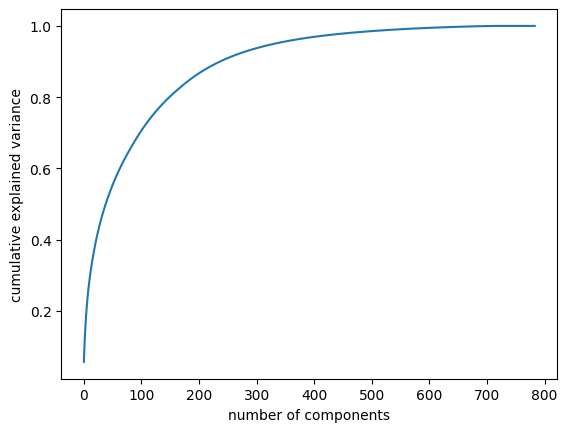

In [51]:
#SCREE PLOT
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [52]:
#find value where cumulative variance is 95%
num_components = np.argmax(cumulative_variance_ratio > 95)
print(f"Number of components required to explain 95% of variance: {num_components}")

Number of components required to explain 95% of variance: 331


In [53]:
final_pca = PCA(n_components=num_components)
x_transformed = final_pca.fit_transform(x_scaled)

In [69]:
# #MAKE A TABLE OF FIRST FEW EIGENVALUES
data = {
    'PC1': final_pca.explained_variance_[0],
    'PC2': final_pca.explained_variance_[1],
    'PC3': final_pca.explained_variance_[2],
    'PC4': final_pca.explained_variance_[3],
    'PC5': final_pca.explained_variance_[4],
    'PC6': final_pca.explained_variance_[5],
    'PC7': final_pca.explained_variance_[6],
    'PC8': final_pca.explained_variance_[7],
    'PC9': final_pca.explained_variance_[8],
    'PC10': final_pca.explained_variance_[9]
}
data


{'PC1': 40.57172850595914,
 'PC2': 29.056829147161626,
 'PC3': 26.87856923294956,
 'PC4': 20.800964786211008,
 'PC5': 18.12446406189253,
 'PC6': 15.764652778370202,
 'PC7': 13.763884239057973,
 'PC8': 12.515695350999831,
 'PC9': 11.016904893334987,
 'PC10': 10.0380056904267}

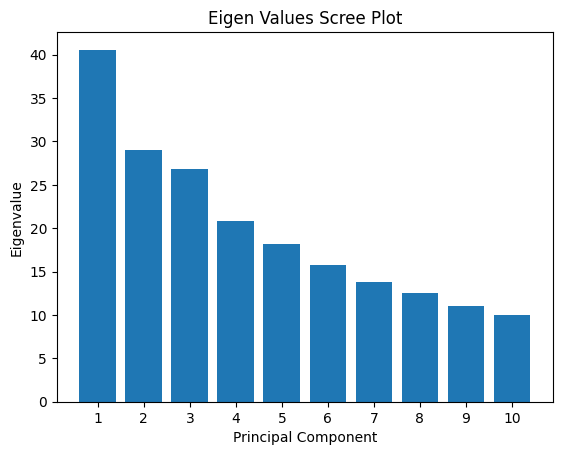

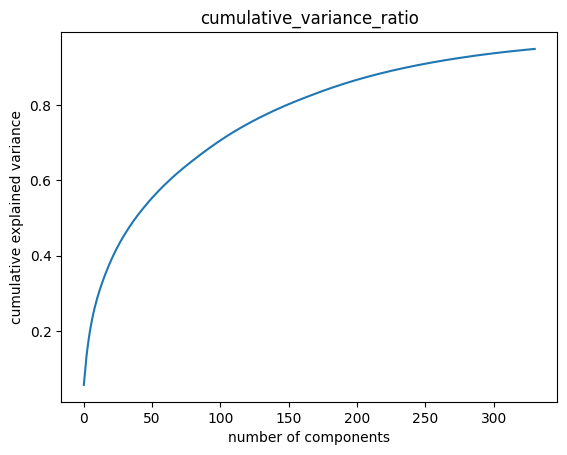

In [74]:
#plot these eigenvalues
plt.bar(range(1,11),final_pca.explained_variance_[0:10])
plt.title('Eigen Values Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1,11))
plt.show()

#SCREE PLOT
plt.plot(np.cumsum(final_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("cumulative_variance_ratio")
plt.show()



**RUNNING A CLASSIFIER**

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y_binary, test_size=0.14285714, random_state=42)


In [93]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 331)
(60000,)
(10000, 331)
(10000,)


In [96]:
#running a neural network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

[0 0 0 ... 0 0 0]
Accuracy: 0.9951


In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc
import seaborn as sns

In [99]:
y_pred = mlp.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

[0 0 0 ... 0 0 0]
Accuracy: 0.9951


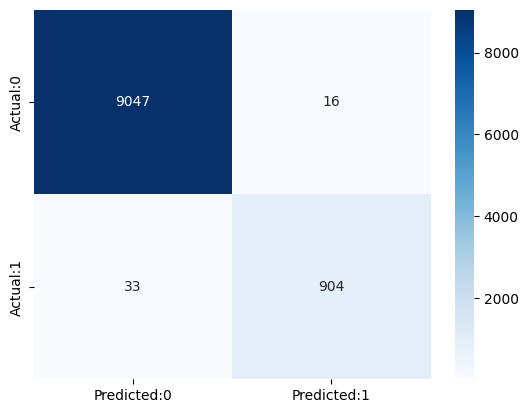

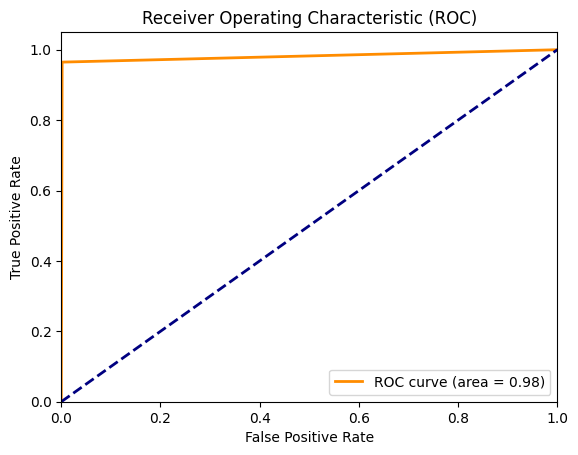

In [101]:

#plot the heatmap with labels
confusionlabeled_matrix = pd.DataFrame(data=confusion_matrix(y_test,y_pred), index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(confusionlabeled_matrix,annot=True,fmt='d',cmap='Blues')
confusionlabeled_matrix

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()